In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
os.chdir(r"E:\OneDrive\Desktop\4th sem\HSO201\project")
rel =pd.read_csv('RELIANCE.csv') 
tcs =pd.read_csv('TCS.csv') 
infy =pd.read_csv('INFY.csv') 
hul =pd.read_csv('HINDUNILVR.csv') 
hdfc =pd.read_csv('HDFCBANK.csv') 

In [3]:
rel

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-04,458.404785,479.975311,454.690002,470.614044,426.631439,87644390
1,2009-05-11,475.245148,489.212738,456.423553,483.095734,437.946655,83869117
2,2009-05-18,531.709900,627.799072,517.841370,541.306458,490.717102,103763496
3,2009-05-25,544.835510,571.507690,527.623657,562.641724,510.058472,87655030
4,2009-06-01,577.030334,577.030334,534.929382,547.993103,496.778870,73702160
...,...,...,...,...,...,...,...
517,2019-04-01,1357.135742,1393.590210,1330.389282,1341.186890,1328.811035,41453537
518,2019-04-08,1343.267212,1344.753052,1308.595825,1330.488281,1318.211182,37850396
519,2019-04-15,1332.370483,1376.700317,1322.464355,1372.935913,1360.267212,30427878
520,2019-04-22,1347.229614,1399.137573,1328.705200,1379.721558,1366.990234,48483456


In [4]:
rel.describe()

,Open,High,Low,Close,Adj Close,Volume
count,522.000000,522.000000,522.000000,522.000000,522.000000,5.220000e+02
mean,571.335366,587.764072,556.241823,572.417658,548.579649,3.923586e+07
std,233.453430,240.716594,228.344837,235.989672,241.065992,1.727671e+07
min,335.321472,348.100342,333.365021,339.407745,314.306183,1.361037e+07
25%,430.896782,441.737778,417.727860,430.376716,406.962601,2.717088e+07
50%,492.308411,504.170959,481.349777,492.011215,462.664261,3.549132e+07
75%,540.414917,559.063126,527.097397,541.204300,512.350006,4.609215e+07
max,1379.721558,1404.189697,1353.965698,1395.620850,1382.742798,1.292719e+08


In [5]:
infy.shape

(522, 7)

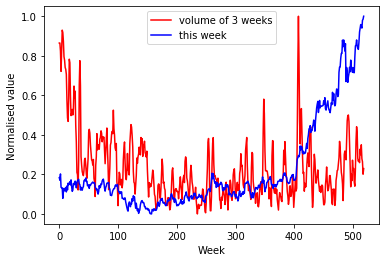

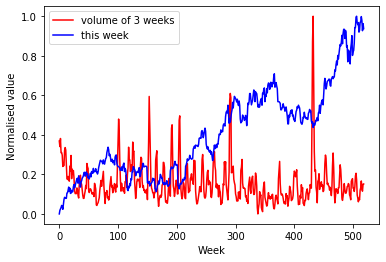

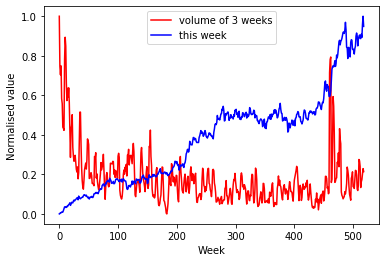

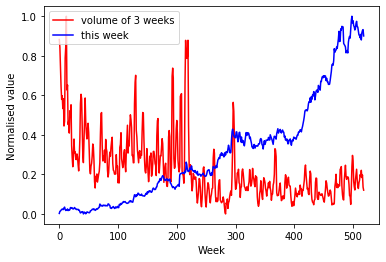

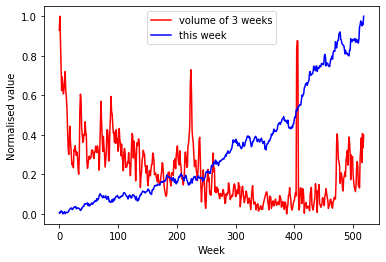

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()

for co in [rel, infy, tcs, hul, hdfc] :
    X = np.zeros([519,1])
    Y = np.zeros([519,1]).astype('int')
    for i in range (0,519):
        X[i,:]=np.mean(co.loc[i:(i+2),'Volume'])
        Y[i,:]=np.array(co.loc[i+3,'Adj Close'])
    X = min_max_scaler.fit_transform(X)
    Y = min_max_scaler.fit_transform(Y)
    plt.plot(X, color = 'red', label = 'volume of 3 weeks')
    plt.plot(Y, color = 'blue', label = 'this week')
    plt.xlabel("Week")
    plt.ylabel("Normalised value")
    plt.legend()
    plt.show()    

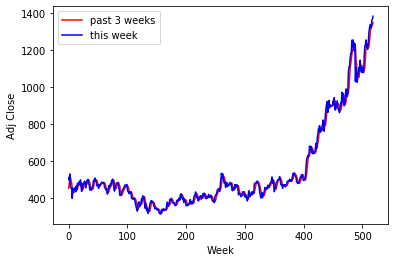

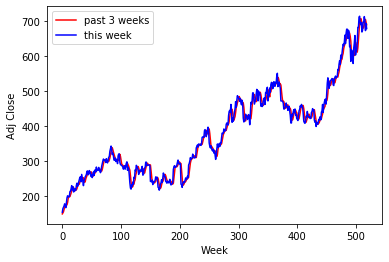

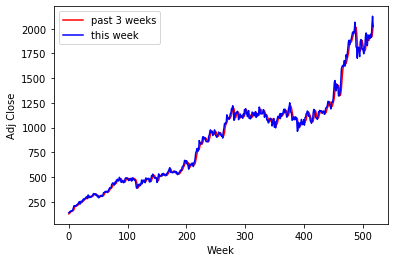

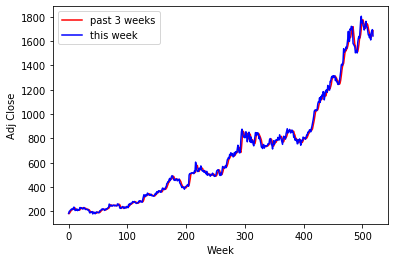

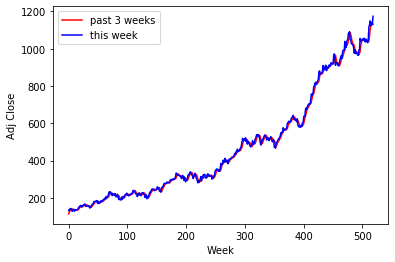

In [7]:
for co in [rel, infy, tcs, hul, hdfc] :
    X = np.zeros([519,1])
    Y = np.zeros([519,1]).astype('int')
    for i in range (0,519):
        X[i,:]=np.mean(co.loc[i:(i+2),'Adj Close'])
        Y[i,]=np.array(co.loc[i+3,'Adj Close'])
    plt.plot(X, color = 'red', label = 'past 3 weeks')
    plt.plot(Y, color = 'blue', label = 'this week')
    plt.xlabel("Week")
    plt.ylabel("Adj Close")
    plt.legend()
    plt.show()    

Epoch 1/100
42/42 [==============================] - 1s 2ms/step - loss: 546.3342
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 547.5059
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 541.2367
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 497.4674
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 399.3383
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 231.9469
Epoch 7/100
42/42 [==============================] - 0s 2ms/step - loss: 158.0541
Epoch 8/100
42/42 [==============================] - 0s 3ms/step - loss: 123.6555
Epoch 9/100
42/42 [==============================] - 0s 3ms/step - loss: 108.9963
Epoch 10/100
42/42 [==============================] - 0s 3ms/step - loss: 99.5222
Epoch 11/100
42/42 [==============================] - 0s 3ms/step - loss: 82.6913
Epoch 12/100
42/42 [==============================] - 0s 2ms/step - loss: 68.3171
Epoch 13/100
42/

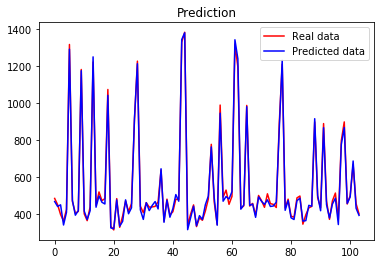

In [8]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split

X = np.zeros([519,3])  
Y = np.zeros([519,]).astype('int')
for i in range (0,519):
    X[i,:]=np.array(rel.loc[i:(i+2),'Adj Close'])
    Y[i,]=np.array(rel.loc[i+3,'Adj Close'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim=3))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam',loss = 'mean_absolute_error')
model.fit(X_train, y_train, batch_size = 10, epochs = 100)
y_pred = model.predict(X_test)
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [9]:
y_pred = y_pred.reshape(104,)

In [10]:
(y_pred - y_test)

array([-16.79550171,  -9.48461914,  52.47698975, -21.38394165,
       -14.73968506, -25.40466309,   6.0249939 , -10.49301147,
         4.35971069,  -6.64697266,  14.76092529,   6.09637451,
       -20.09707642,  28.08520508, -10.40689087, -22.01272583,
        -8.7616272 , -29.00939941, -31.47424316,  -9.01702881,
         6.24588013,  -7.13247681,   5.76690674, -29.10281372,
         6.2807312 , -11.70220947, -22.75967407,   7.10205078,
       -13.94445801, -19.92962646, -36.17330933,   0.14682007,
       -18.54086304,   7.86221313,  26.19421387, -38.7008667 ,
         7.04510498,  -5.79559326,  -5.48455811, -12.41207886,
        16.29318237,  24.81658936,  -9.13430786,  14.18847656,
        -3.06835938, -21.6546936 , -20.02096558,  -7.04452515,
         4.46896362,  11.87661743,   4.42840576,  34.43551636,
        15.61294556, -13.98406982,  22.20236206,  -3.53829956,
       -43.82006836, -21.95230103, -34.8677063 ,  28.73733521,
        25.55889893,  23.36230469,  44.32080078,  -3.91

In [11]:
mae= sum(abs(y_pred - y_test) ) / len(y_test)
rmse = np.sqrt(sum( (y_pred - y_test)**2 ) / len(y_test))
r2 = r2_score(y_test, y_pred)
print ("MAE : ", mae)
print ("RMSE : ", rmse)
print ("R2_score : ", r2)

MAE :  16.28123327401968
RMSE :  19.499225537441152
R2_score :  0.9946056503555923


Epoch 1/100
42/42 [==============================] - 1s 2ms/step - loss: 387.7786
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 370.3365
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 345.7164
Epoch 4/100
42/42 [==============================] - 0s 2ms/step - loss: 248.0174
Epoch 5/100
42/42 [==============================] - 0s 2ms/step - loss: 122.2492
Epoch 6/100
42/42 [==============================] - 0s 2ms/step - loss: 111.3272
Epoch 7/100
42/42 [==============================] - 0s 2ms/step - loss: 98.8845
Epoch 8/100
42/42 [==============================] - 0s 3ms/step - loss: 86.5262
Epoch 9/100
42/42 [==============================] - 0s 3ms/step - loss: 66.0206
Epoch 10/100
42/42 [==============================] - 0s 2ms/step - loss: 50.3842
Epoch 11/100
42/42 [==============================] - 0s 3ms/step - loss: 32.6627
Epoch 12/100
42/42 [==============================] - 0s 3ms/step - loss: 20.6751
Epoch 13/100
42/42 

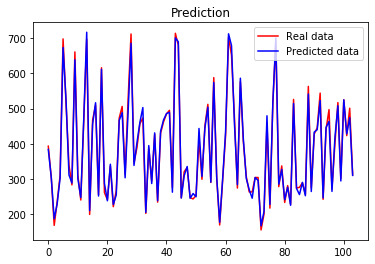

In [12]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split

X = np.zeros([519,3])  
Y = np.zeros([519,]).astype('int')
for i in range (0,519):
    X[i,:]=np.array(infy.loc[i:(i+2),'Adj Close'])
    Y[i,]=np.array(infy.loc[i+3,'Adj Close'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim=3))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam',loss = 'mean_absolute_error')
model.fit(X_train, y_train, batch_size = 10, epochs = 100)
y_pred = model.predict(X_test)
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [13]:
y_pred = y_pred.reshape(104,)
mae= sum(abs(y_pred - y_test) ) / len(y_test)
rmse = np.sqrt(sum( (y_pred - y_test)**2 ) / len(y_test))
r2 = r2_score(y_test, y_pred)
print ("MAE : ", mae)
print ("RMSE : ", rmse)
print ("R2_score : ", r2)

MAE :  10.181630501380333
RMSE :  13.01525453491421
R2_score :  0.991842279830519


Epoch 1/100
42/42 [==============================] - 1s 3ms/step - loss: 479.5515
Epoch 2/100
42/42 [==============================] - 0s 2ms/step - loss: 473.9828
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 448.3814
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 422.4840
Epoch 5/100
42/42 [==============================] - 0s 2ms/step - loss: 246.9639
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 135.1834
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 120.7567
Epoch 8/100
42/42 [==============================] - 0s 3ms/step - loss: 111.0262
Epoch 9/100
42/42 [==============================] - 0s 3ms/step - loss: 99.8776
Epoch 10/100
42/42 [==============================] - 0s 3ms/step - loss: 78.9832
Epoch 11/100
42/42 [==============================] - 0s 3ms/step - loss: 59.6457
Epoch 12/100
42/42 [==============================] - 0s 3ms/step - loss: 39.8973
Epoch 13/100
42/4

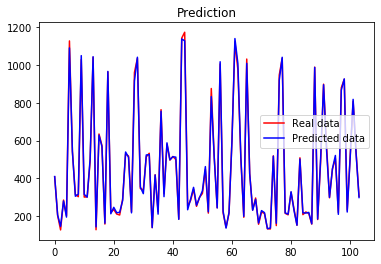

In [14]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split

X = np.zeros([519,3])  
Y = np.zeros([519,]).astype('int')
for i in range (0,519):
    X[i,:]=np.array(hdfc.loc[i:(i+2),'Adj Close'])
    Y[i,]=np.array(hdfc.loc[i+3,'Adj Close'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim=3))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam',loss = 'mean_absolute_error')
model.fit(X_train, y_train, batch_size = 10, epochs = 100)
y_pred = model.predict(X_test)
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [15]:
y_pred = y_pred.reshape(104,)
mae= sum(abs(y_pred - y_test) ) / len(y_test)
rmse = np.sqrt(sum( (y_pred - y_test)**2 ) / len(y_test))
r2 = r2_score(y_test, y_pred)
print ("MAE : ", mae)
print ("RMSE : ", rmse)
print ("R2_score : ", r2)

MAE :  9.30754778935359
RMSE :  12.98853820310079
R2_score :  0.9981265199518946


Epoch 1/100
42/42 [==============================] - 1s 3ms/step - loss: 689.8389
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 670.3477
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 687.3234
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 611.3953
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 479.2370
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 338.4534
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 219.1677
Epoch 8/100
42/42 [==============================] - 0s 3ms/step - loss: 197.8741
Epoch 9/100
42/42 [==============================] - 0s 2ms/step - loss: 165.1926
Epoch 10/100
42/42 [==============================] - 0s 3ms/step - loss: 130.3790
Epoch 11/100
42/42 [==============================] - 0s 3ms/step - loss: 104.4889
Epoch 12/100
42/42 [==============================] - 0s 3ms/step - loss: 73.2949
Epoch 13/100
4

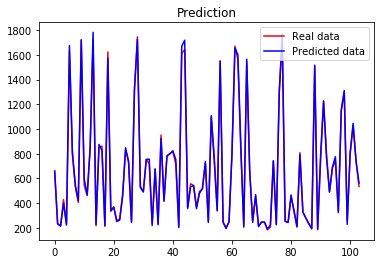

In [16]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split

X = np.zeros([519,3])  
Y = np.zeros([519,]).astype('int')
for i in range (0,519):
    X[i,:]=np.array(hul.loc[i:(i+2),'Adj Close'])
    Y[i,]=np.array(hul.loc[i+3,'Adj Close'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim=3))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam',loss = 'mean_absolute_error')
model.fit(X_train, y_train, batch_size = 10, epochs = 100)
y_pred = model.predict(X_test)
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [17]:
y_pred = y_pred.reshape(104,)
mae= sum(abs(y_pred - y_test) ) / len(y_test)
rmse = np.sqrt(sum( (y_pred - y_test)**2 ) / len(y_test))
r2 = r2_score(y_test, y_pred)
print ("MAE : ", mae)
print ("RMSE : ", rmse)
print ("R2_score : ", r2)

MAE :  15.656288587130033
RMSE :  21.952518770664724
R2_score :  0.9977248426874024


Epoch 1/100
42/42 [==============================] - 1s 3ms/step - loss: 928.3167
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 911.7149
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 908.6957
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 821.6409
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 670.2900
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 518.4144
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 314.6118
Epoch 8/100
42/42 [==============================] - 0s 3ms/step - loss: 250.0320
Epoch 9/100
42/42 [==============================] - 0s 3ms/step - loss: 213.0472
Epoch 10/100
42/42 [==============================] - 0s 2ms/step - loss: 183.8977
Epoch 11/100
42/42 [==============================] - 0s 3ms/step - loss: 147.1351
Epoch 12/100
42/42 [==============================] - 0s 3ms/step - loss: 143.6281
Epoch 13/100


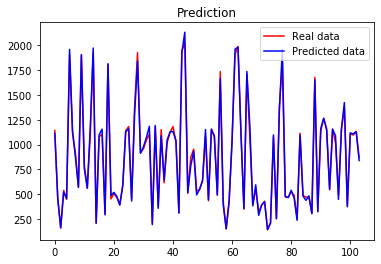

In [18]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split

X = np.zeros([519,3])  
Y = np.zeros([519,]).astype('int')
for i in range (0,519):
    X[i,:]=np.array(tcs.loc[i:(i+2),'Adj Close'])
    Y[i,]=np.array(tcs.loc[i+3,'Adj Close'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim=3))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam',loss = 'mean_absolute_error')
model.fit(X_train, y_train, batch_size = 10, epochs = 100)
y_pred = model.predict(X_test)
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [19]:
y_pred = y_pred.reshape(104,)
mae= sum(abs(y_pred - y_test) ) / len(y_test)
rmse = np.sqrt(sum( (y_pred - y_test)**2 ) / len(y_test))
r2 = r2_score(y_test, y_pred)
print ("MAE : ", mae)
print ("RMSE : ", rmse)
print ("R2_score : ", r2)

MAE :  25.251205004178562
RMSE :  37.084438480523616
R2_score :  0.9946566756161187


In [20]:
def pipeline (co):
   
    X = np.zeros([519,3])
    Y = np.zeros([519,]).astype('int')
    
    for i in range (0,519):
        X[i,:]=np.array(co.loc[i:(i+2),'Adj Close'])
        Y[i,]=np.array(co.loc[i+3,'Adj Close'])
   
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  
    regressor = [ RandomForestRegressor(), SVR(),  XGBRegressor() , GaussianNB()] 
    for reg in regressor:
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        mae= sum(abs(pred - y_test) ) / len(y_test)
        rmse= np.sqrt(sum( (pred - y_test)**2 ) / len(y_test))
        r2 = r2_score(y_test, pred)
        print ("Regressor : ", reg)
        print ("MAE : ", mae)
        print ("RMSE : ", rmse)
        print ("R2_score : ", r2)
    

In [21]:
for co in [rel, infy, tcs, hul, hdfc] :
    pipeline(co)

Regressor :  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
MAE :  17.175961538461543
RMSE :  22.61523588713523
R2_score :  0.9927438439931648
Regressor :  SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
MAE :  118.48766793561747
RMSE :  238.38356205000287
R2_score :  0.1937736700619781
Regressor :  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       

R2_score :  0.994468298259823


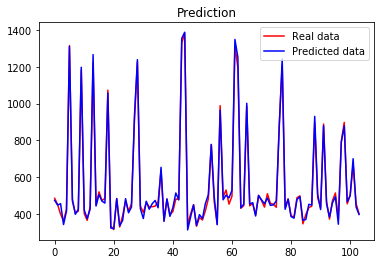

In [22]:
X = np.zeros([519,3])
Y = np.zeros([519,]).astype('int')
for i in range (0,519):
    X[i,:]=np.array(rel.loc[i:(i+2),'Adj Close'])
    Y[i,]=np.array(rel.loc[i+3,'Adj Close'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
reg = SVR(kernel='linear')
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
r2 = r2_score(y_test, pred)
print ("R2_score : ", r2)
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

R2_score :  0.9924755778666846


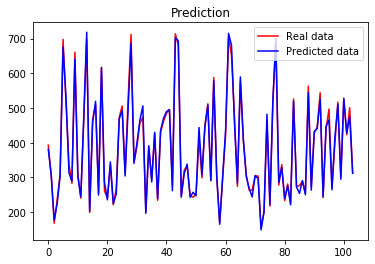

In [23]:
X = np.zeros([519,3])
Y = np.zeros([519,]).astype('int')
for i in range (0,519):
    X[i,:]=np.array(infy.loc[i:(i+2),'Adj Close'])
    Y[i,]=np.array(infy.loc[i+3,'Adj Close'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
reg = SVR(kernel='linear')
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
r2 = r2_score(y_test, pred)
print ("R2_score : ", r2)
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

R2_score :  0.9950299648228957


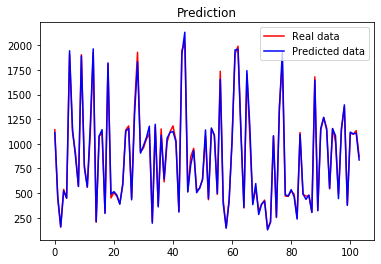

In [24]:
X = np.zeros([519,3])
Y = np.zeros([519,]).astype('int')
for i in range (0,519):
    X[i,:]=np.array(tcs.loc[i:(i+2),'Adj Close'])
    Y[i,]=np.array(tcs.loc[i+3,'Adj Close'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
reg = SVR(kernel='linear')
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
r2 = r2_score(y_test, pred)
print ("R2_score : ", r2)
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

R2_score :  0.9982408601831962


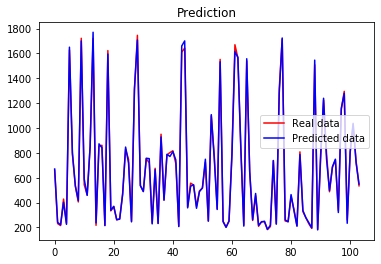

In [25]:
X = np.zeros([519,3])
Y = np.zeros([519,]).astype('int')
for i in range (0,519):
    X[i,:]=np.array(hul.loc[i:(i+2),'Adj Close'])
    Y[i,]=np.array(hul.loc[i+3,'Adj Close'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
reg = SVR(kernel='linear')
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
r2 = r2_score(y_test, pred)
print ("R2_score : ", r2)
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

R2_score :  0.9984257988542586


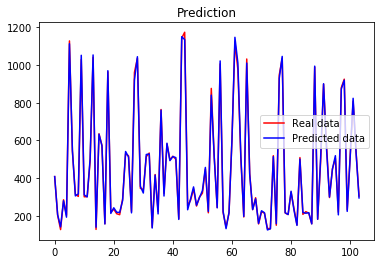

In [26]:
X = np.zeros([519,3])
Y = np.zeros([519,]).astype('int')
for i in range (0,519):
    X[i,:]=np.array(hdfc.loc[i:(i+2),'Adj Close'])
    Y[i,]=np.array(hdfc.loc[i+3,'Adj Close'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
reg = SVR(kernel='linear')
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
r2 = r2_score(y_test, pred)
print ("R2_score : ", r2)
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()